In [1]:
# The goal of this project is to analyze the F1 data from 1950 to 2020

# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# # Directory containing the F1 Dataset from 1950 - 2020
# dir = './f1-dataset/'

# f1_csv_files = [os.path.join(dir, file) for file in os.listdir(dir) if file.endswith('.csv')]

# # Read all the csv files into a list of dataframes
# f1_dfs = []
# for file in f1_csv_files:
#     f1_dfs.append(pd.read_csv(file, encoding='ISO-8859-1'))

# # Concatenate all the dataframes into a single dataframe
# f1_df = pd.concat(f1_dfs, ignore_index=True)

In [3]:
# Load the dataset files independently
df_race_wins = pd.read_csv('./f1-dataset/race_wins_1950-2020.csv', encoding='ISO-8859-1')

In [4]:
df_race_wins.head()

,Unnamed: 0,Venue,Date,Name,NameTag,Team,Laps,Time
0,0,Great Britain,13 May 1950,Nino Farina,FAR,Alfa Romeo,70.0,2:13:23.600
1,1,Monaco,21 May 1950,Juan Manuel Fangio,FAN,Alfa Romeo,100.0,3:13:18.700
2,2,Indianapolis 500,30 May 1950,Johnnie Parsons,PAR,Kurtis Kraft Offenhauser,138.0,2:46:55.970
3,3,Switzerland,04 Jun 1950,Nino Farina,FAR,Alfa Romeo,42.0,2:02:53.700
4,4,Belgium,18 Jun 1950,Juan Manuel Fangio,FAN,Alfa Romeo,35.0,2:47:26.000


In [5]:
# Get the first five rows of the dataset
df_race_wins.head()

,Unnamed: 0,Venue,Date,Name,NameTag,Team,Laps,Time
0,0,Great Britain,13 May 1950,Nino Farina,FAR,Alfa Romeo,70.0,2:13:23.600
1,1,Monaco,21 May 1950,Juan Manuel Fangio,FAN,Alfa Romeo,100.0,3:13:18.700
2,2,Indianapolis 500,30 May 1950,Johnnie Parsons,PAR,Kurtis Kraft Offenhauser,138.0,2:46:55.970
3,3,Switzerland,04 Jun 1950,Nino Farina,FAR,Alfa Romeo,42.0,2:02:53.700
4,4,Belgium,18 Jun 1950,Juan Manuel Fangio,FAN,Alfa Romeo,35.0,2:47:26.000


In [6]:
# Get the last five rows of the dataset
df_race_wins.tail()

,Unnamed: 0,Venue,Date,Name,NameTag,Team,Laps,Time
1033,1033,Emilia Romagna,01 Nov 2020,Lewis Hamilton,HAM,Mercedes,63.0,1:28:32.430
1034,1034,Turkey,15 Nov 2020,Lewis Hamilton,HAM,Mercedes,58.0,1:42:19.313
1035,1035,Bahrain,29 Nov 2020,Lewis Hamilton,HAM,Mercedes,57.0,2:59:47.515
1036,1036,Sakhir,06 Dec 2020,Sergio Perez,PER,Racing Point BWT Mercedes,87.0,1:31:15.114
1037,1037,Abu Dhabi,13 Dec 2020,Max Verstappen,VER,Red Bull Racing Honda,55.0,1:36:28.645


In [7]:
# Get the summary of the dataset
df_race_wins.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1038 non-null   int64  
 1   Venue       1038 non-null   object 
 2   Date        1038 non-null   object 
 3   Name        1038 non-null   object 
 4   NameTag     1038 non-null   object 
 5   Team        1038 non-null   object 
 6   Laps        1035 non-null   float64
 7   Time        1035 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 65.0+ KB


In [8]:
df_race_wins.describe()

,Unnamed: 0,Laps
count,1038.000000,1035.000000
mean,518.500000,65.048309
std,299.789093,20.684271
min,0.000000,12.000000
25%,259.250000,54.000000
50%,518.500000,65.000000
75%,777.750000,75.000000
max,1037.000000,200.000000


In [9]:
# Get the number of rows and columns in the dataset
df_race_wins.shape

(1038, 8)

In [10]:
# Get the missing values in the dataset
df_race_wins.isnull().sum()

Unnamed: 0    0
Venue         0
Date          0
Name          0
NameTag       0
Team          0
Laps          3
Time          3
dtype: int64

In [11]:
# Check for duplicates in the dataset
df_race_wins.duplicated().sum()

0

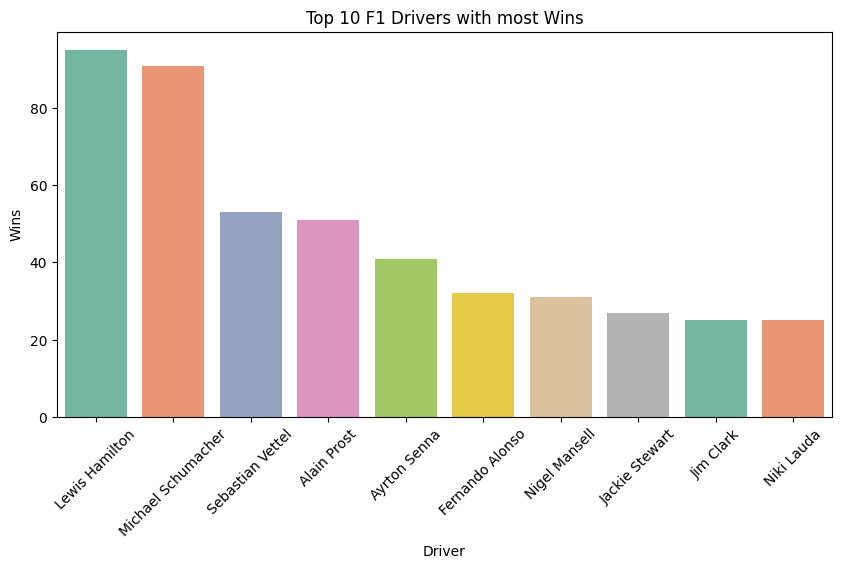

In [12]:
# A bar chart showing the number of wins per driver in the 2020 season. The color scheme should be the same as the one used in the F1 website.
# The x-axis should be the driver's name and the y-axis should be the number of wins.
# The title of the chart should be "2020 F1 Driver Standings"

# Get the 2020 season data

# Get the number of wins per driver

# Plot the bar chart

# Code
wins = df_race_wins['Name'].value_counts()
wins = wins.sort_values(ascending=False)
wins = wins[:10]
plt.figure(figsize=(10, 5))
sns.barplot(x=wins.index, y=wins.values, palette='Set2')
plt.title('Top 10 F1 Drivers with most Wins')
plt.xlabel('Driver')
plt.ylabel('Wins')
plt.xticks(rotation=45)
plt.show()


<AxesSubplot: title={'center': 'Number of Wins by Venue'}, xlabel='Venue'>

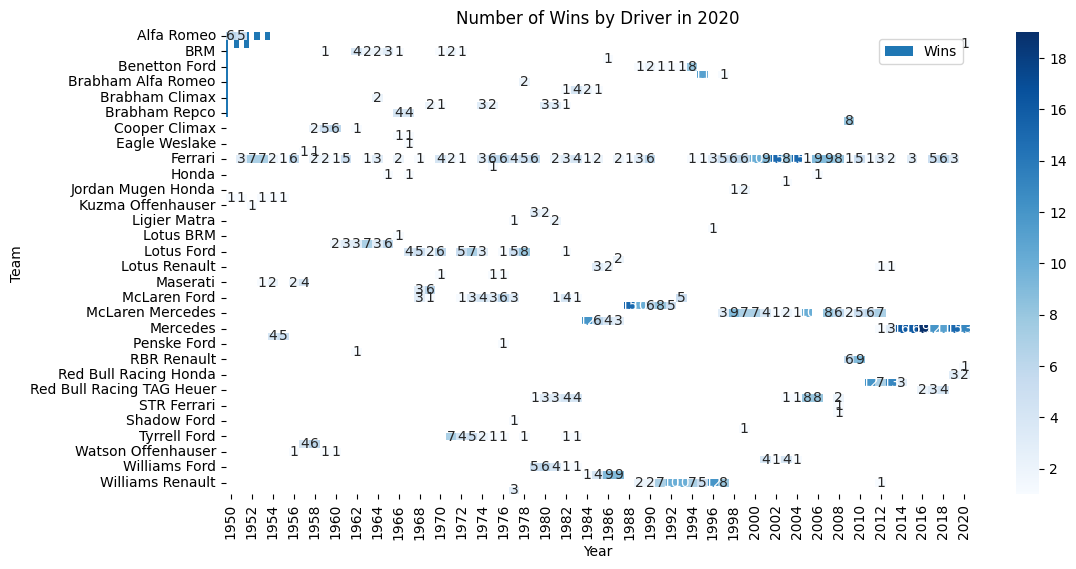

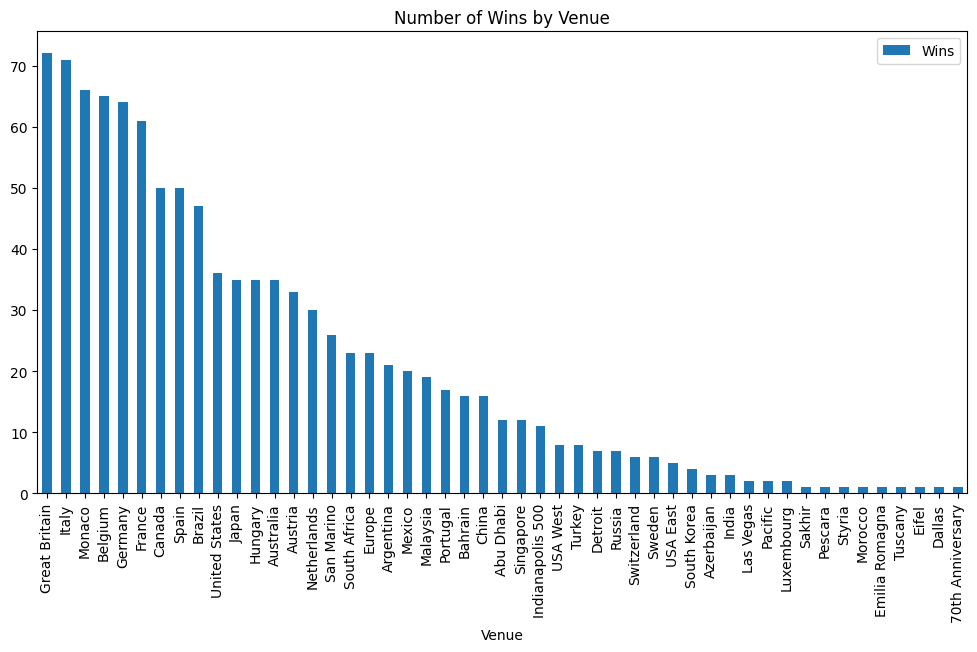

In [13]:
# Convert the `Date` column to datetime type
df_race_wins['Date'] = pd.to_datetime(df_race_wins['Date'])

# # Split the 'Time' column into hours, minutes, seconds and milliseconds
# df['Hours'], df['Minutes'], rest = df['Time'].str.split(':', 2).str
# df['Seconds'], df['Milliseconds'] = rest.str.split('.', 1).str

# # Convert the columns to numeric type
# df['Hours'] = df['Hours'].astype('int')
# df['Minutes'] = df['Minutes'].astype('int')
# df['Seconds'] = df['Seconds'].astype('int')
# df['Milliseconds'] = df['Milliseconds'].astype('int')

# # Create a new column 'Winning Time' based on the hours, minutes, seconds and milliseconds
# df['Winning Time'] = pd.to_timedelta(df['Hours'].astype(str) + ':' + df['Minutes'].astype(str) + ':' + df['Seconds'].astype(str) + '.' + df['Milliseconds'].astype(str))

# Create a new column `Year` based on the `Date` column
df_race_wins['Year'] = df_race_wins['Date'].dt.year

# Group the data by `Name` and `Year`, and count the number of wins
driver_wins_by_year = df_race_wins.groupby(['Name', 'Year']).size().reset_index(name='Wins')

# Plot a bar chart of the number of wins by driver in a particular year
year = 2020
driver_wins_by_year[driver_wins_by_year['Year'] == year].sort_values('Wins', ascending=False).plot(kind='bar', x='Name', y='Wins', figsize=(12,6), title=f"Number of Wins by Driver in {year}")

# # Plot a scatter plot of the number of laps vs the winning time
# sns.scatterplot(data=df_race_wins, x='Laps', y='Time', hue='Year', alpha=0.7)

# Plot a heatmap of the number of wins by team and year
team_wins_by_year = df_race_wins.groupby(['Team', 'Year']).size().unstack()
sns.heatmap(team_wins_by_year, cmap='Blues', annot=True, fmt='g')

# Plot a line chart of the number of wins by year
wins_by_year = df_race_wins.groupby('Year').size().reset_index(name='Wins')
sns.lineplot(data=wins_by_year, x='Year', y='Wins')

# Plot a bar chart of the number of wins by venue
wins_by_venue = df_race_wins.groupby('Venue').size().reset_index(name='Wins')
wins_by_venue.sort_values('Wins', ascending=False).plot(kind='bar', x='Venue', y='Wins', figsize=(12,6), title="Number of Wins by Venue")


<AxesSubplot: xlabel='Year', ylabel='Wins'>

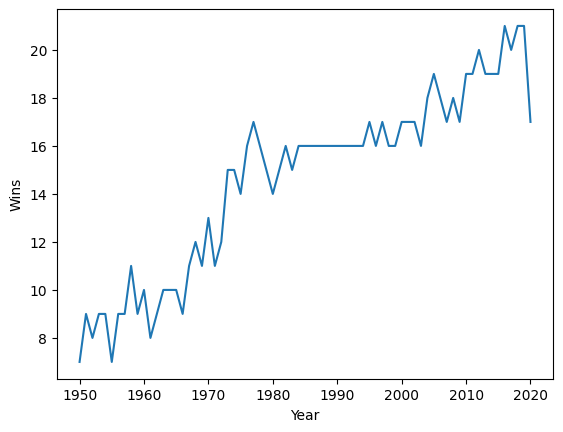

In [14]:
# Plot a line chart of the number of wins by year
wins_by_year = df_race_wins.groupby('Year').size().reset_index(name='Wins')
sns.lineplot(data=wins_by_year, x='Year', y='Wins')

<AxesSubplot: xlabel='Year', ylabel='Wins'>

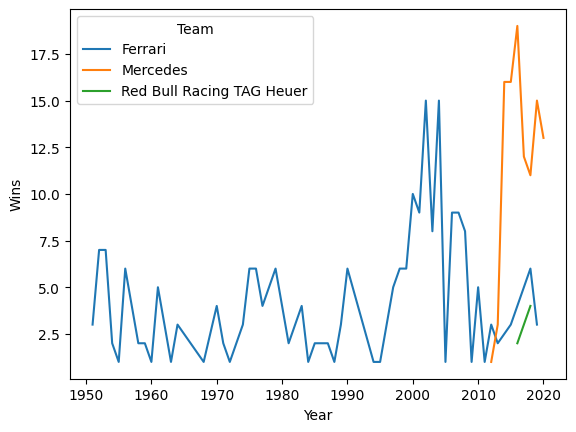

In [15]:
# Plot a line chart of the number of wins by Ferrari, Mercedes and RedBull by year
wins_by_year = df_race_wins.groupby(['Year', 'Team']).size().reset_index(name='Wins')
sns.lineplot(data=wins_by_year[wins_by_year['Team'].isin(['Ferrari', 'Mercedes', 'Red Bull Racing TAG Heuer'])], x='Year', y='Wins', hue='Team')

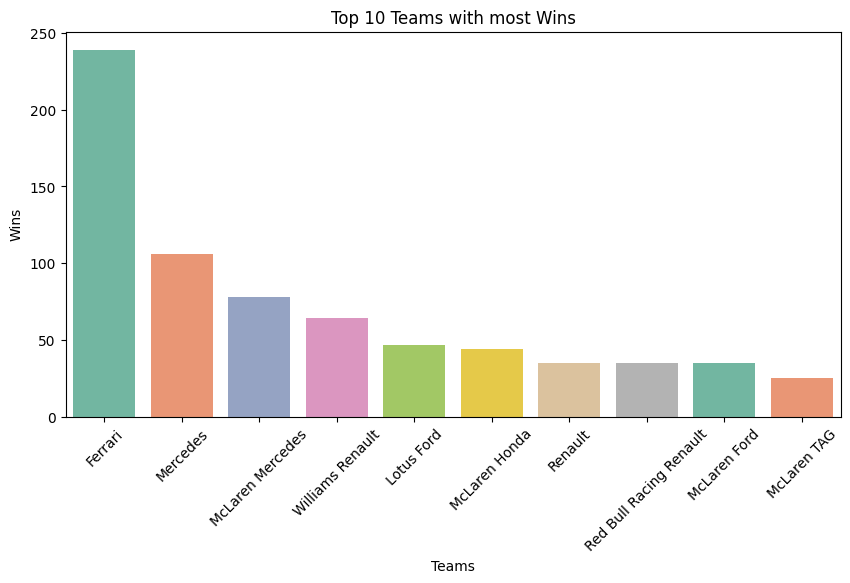

In [16]:
# Plot a bar graph of the total number of wins by team

# Get the number of wins per team

# Plot the bar chart

# Code

wins = df_race_wins['Team'].value_counts()
wins = wins.sort_values(ascending=False)
wins = wins[:10]
plt.figure(figsize=(10, 5))
sns.barplot(x=wins.index, y=wins.values, palette='Set2')
plt.title('Top 10 Teams with most Wins')
plt.xlabel('Teams')
plt.ylabel('Wins')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Plot a bar chart of the number of wins by driver in a particular year
year = 2020
driver


NameError: name 'driver_wins' is not defined

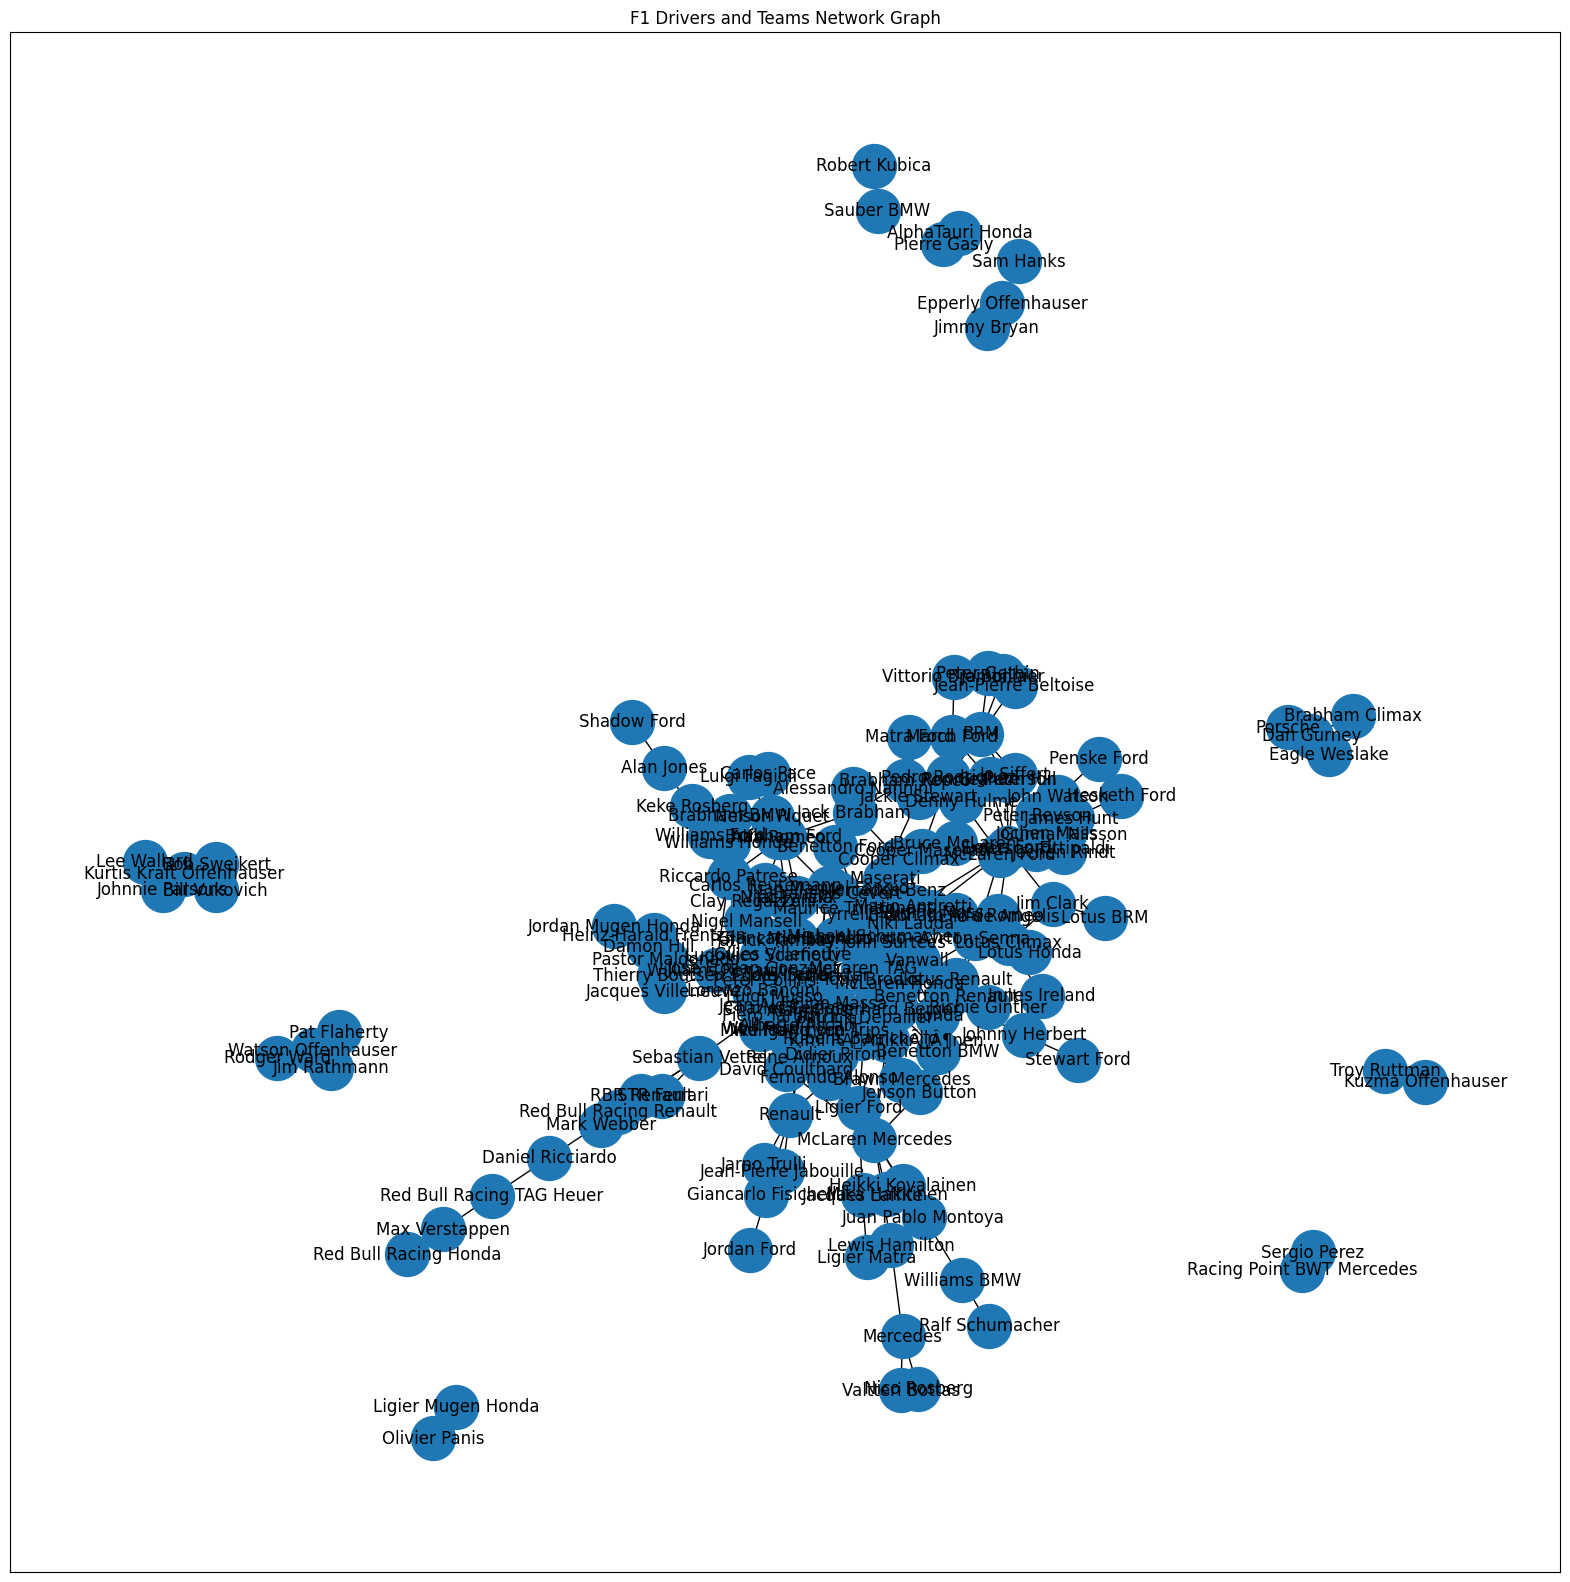

In [20]:
# A network graph show the connection between drivers and teams. The nodes should be the drivers and the teams. The edges should be the connection between the drivers and the teams. The color of the nodes should be the same as the one used in the F1 website. The size of the nodes should be proportional to the number of wins. The width of the edges should be proportional to the number of wins. The title of the graph should be "F1 Drivers and Teams Network Graph".
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add nodes to the graph
drivers = df_race_wins['Name'].unique()
teams = df_race_wins['Team'].unique()
G.add_nodes_from(drivers, bipartite=0)
G.add_nodes_from(teams, bipartite=1)

# Add edges to the graph
for i in range(len(df_race_wins)):
    G.add_edge(df_race_wins['Name'][i], df_race_wins['Team'][i])

# # Get the number of wins per driver
# driver_wins = df['Name'].value_counts()

# # Get the number of wins per team
# team_wins = df['Team'].value_counts()

# # Get the number of wins per driver and team
# driver_team_wins = df.groupby(['Name', 'Team']).size().reset_index(name='Wins')

# # Get the color of the nodes
# colors = []
# for node in G.nodes():
#     if node in drivers:
#         colors.append('red')
#     else:
#         colors.append('blue')
    
# # Get the size of the nodes
# sizes = []
# for node in G.nodes():
#     if node in drivers:
#         sizes.append(driver_wins[node]*100)
#     else:
#         sizes.append(team_wins[node]*100)

# # Get the width of the edges
# widths = []
# for edge in G.edges():
#     driver = edge[0]
#     team = edge[1]
#     widths.append(driver_team_wins[(driver_team_wins['Name'] == driver) & (driver_team_wins['Team'] == team)]['Wins'].values[0]*2)

# # Plot the graph
# plt.figure(figsize=(20, 20))
# nx.draw(G, with_labels=True, node_color=colors, node_size=sizes, width=widths)
# plt.title('F1 Drivers and Teams Network Graph')
# plt.show()

# Draw the network graph
plt.figure(figsize=(20, 20))
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=True, node_size=1000)
plt.title('F1 Drivers and Teams Network Graph')
plt.show()